In [1]:
from PIL import Image
import torch.nn.functional as F
import os
from tqdm import tqdm
import torch
import numpy as np


C:\Users\adhocmaster\anaconda3\envs\map2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
randImg = (np.random.sample((64, 64)) * 255).astype(np.uint8)

In [3]:
randImg.shape

(64, 64)

In [4]:
randImg

array([[109,  50,  82, ..., 224, 174, 241],
       [ 62, 185, 182, ..., 248,  60, 207],
       [ 24,  96,  16, ..., 215,  93,  53],
       ...,
       [ 91, 141,  72, ..., 121, 119,  12],
       [ 52,  43, 200, ..., 116, 225, 254],
       [ 60, 225, 128, ..., 176,  97, 224]], dtype=uint8)

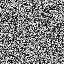

In [5]:
img = Image.fromarray(randImg)
img

In [6]:
imT = torch.from_numpy(np.array(randImg)).unsqueeze(0).unsqueeze(0)

In [7]:
imT.shape

torch.Size([1, 1, 64, 64])

In [8]:
imT

tensor([[[[109,  50,  82,  ..., 224, 174, 241],
          [ 62, 185, 182,  ..., 248,  60, 207],
          [ 24,  96,  16,  ..., 215,  93,  53],
          ...,
          [ 91, 141,  72,  ..., 121, 119,  12],
          [ 52,  43, 200,  ..., 116, 225, 254],
          [ 60, 225, 128,  ..., 176,  97, 224]]]], dtype=torch.uint8)

In [9]:
toNp = np.array(imT)

In [10]:
toNp

array([[[[109,  50,  82, ..., 224, 174, 241],
         [ 62, 185, 182, ..., 248,  60, 207],
         [ 24,  96,  16, ..., 215,  93,  53],
         ...,
         [ 91, 141,  72, ..., 121, 119,  12],
         [ 52,  43, 200, ..., 116, 225, 254],
         [ 60, 225, 128, ..., 176,  97, 224]]]], dtype=uint8)

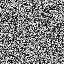

In [11]:
img = Image.fromarray(toNp.squeeze())
img

In [12]:
np2 = np.expand_dims(np.expand_dims(randImg, axis=0), axis=0)

In [13]:
np2.shape

(1, 1, 64, 64)

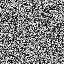

In [14]:
img = Image.fromarray(np2.squeeze())
img

# Dataset

In [15]:
import logging
import sys
from random import randint

root = logging.getLogger()
root.setLevel(logging.INFO)

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

from mapdataset import ImageGroupReader, single_layer_converter, MapsDataset, MapReader, ImageUtils

In [16]:
dillFolder = "../data/output/SF_Layered/32x32/group-1280-stride-10"

2022-11-04 13:13:57,896 - root - INFO - Loading 6400 patches from ../data/output/SF_Layered/32x32/group-1280-stride-10
2022-11-04 13:13:57,897 - root - INFO - reading patch 5404


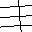

In [18]:
mapsDataset = MapsDataset(
    patch_size=(32, 32), 
    stride=10, 
    sample_group_size=1280, 
    converter=single_layer_converter,
    outputDir="./data/output"
    ) 

mapsDataset.loadPatches(dillFolder)
patchNo = randint(0, len(mapsDataset))
logging.info(f"reading patch {patchNo}")
patch = mapsDataset[patchNo]

# im = ImageUtils.PILPatchToPILImg(patch)
# im = ImageUtils.PILPatchToPILImg(patch)
im = ImageUtils.TorchNpPatchToPILImgGray(patch)
# path = os.path.join(dillFolder, f"{patchNo}.png")
im